<a href="https://colab.research.google.com/github/james-hughes1/wdss-nlp-project/blob/main/Twitter_COP_Conference_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-Amble

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

In [2]:
# Import Datasets

cop24_df = pd.read_csv("Twitter Scrape 4_Sentiment.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Time', 'Category',
                                'Negative Probability', 'Neutral Probability', 'Positive Probability'])
cop25_df = pd.read_csv("Twitter Scrape 3_Sentiment.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Time', 'Category',
                                'Negative Probability', 'Neutral Probability', 'Positive Probability'])
cop26_df = pd.read_csv("Twitter Scrape 2_Sentiment.csv", encoding="UTF-8",
                       usecols=['ID', 'Date', 'Likes', 'Replies', 'Retweets', 'User ID', 'Username',
                                'Followers', 'Verified', 'Content', 'Time', 'Category',
                                'Negative Probability', 'Neutral Probability', 'Positive Probability'])

# Configure Date and Time Columns

cop24_df["Time"] = pd.to_datetime(cop24_df["Time"], format="%H:%M:%S").dt.time
cop24_df["Date"] = pd.to_datetime(cop24_df["Date"], format="%Y-%m-%d").dt.date
cop25_df["Time"] = pd.to_datetime(cop25_df["Time"], format="%H:%M:%S").dt.time
cop25_df["Date"] = pd.to_datetime(cop25_df["Date"], format="%Y-%m-%d").dt.date
cop26_df["Time"] = pd.to_datetime(cop26_df["Time"], format="%H:%M:%S").dt.time
cop26_df["Date"] = pd.to_datetime(cop26_df["Date"], format="%Y-%m-%d").dt.date

In [3]:
# Construct Sentiment and Confidence Columns

cop24_df["Sentiment"] = np.argmax(np.array(cop24_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop24_df["Confidence"] = np.max(np.array(cop24_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop25_df["Sentiment"] = np.argmax(np.array(cop25_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop25_df["Confidence"] = np.max(np.array(cop25_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop26_df["Sentiment"] = np.argmax(np.array(cop26_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)
cop26_df["Confidence"] = np.max(np.array(cop26_df[["Negative Probability", "Neutral Probability", "Positive Probability"]]), axis=1)

In [4]:
sentiment_lookup = {0: "Positive", 1: "Neutral", 2: "Negative"}
cop24_df["Sentiment"] = cop24_df["Sentiment"].apply(lambda x: sentiment_lookup[x])
cop25_df["Sentiment"] = cop25_df["Sentiment"].apply(lambda x: sentiment_lookup[x])
cop26_df["Sentiment"] = cop26_df["Sentiment"].apply(lambda x: sentiment_lookup[x])

In [5]:
# Combine Datasets

master_df = pd.concat([pd.concat([cop24_df, pd.Series(["24"]*len(cop24_df), name="Conference")], axis=1),
                       pd.concat([cop25_df, pd.Series(["25"]*len(cop25_df), name="Conference")], axis=1),
                       pd.concat([cop26_df, pd.Series(["26"]*len(cop26_df), name="Conference")], axis=1)], axis=0)
master_df = master_df.reset_index().drop(columns=["index"])
master_df

,ID,Date,Likes,Replies,Retweets,User ID,Username,Followers,Verified,Content,Time,Category,Negative Probability,Neutral Probability,Positive Probability,Sentiment,Confidence,Conference
0,1063077542490505216,2018-11-15,42,3,32,214842351,PEspinosaC,123749,1,Met with Costa Rican Environment Minister Carl...,14:33:31,Politician,0.565244,0.346330,0.088427,Positive,0.565244,24
1,1063102498725072896,2018-11-15,56,6,36,17463923,UNFCCC,962486,1,"The challenges of #climatechange, #desertifica...",16:12:41,International Organisation,0.197044,0.698451,0.104505,Neutral,0.698451,24
2,1063523438529314816,2018-11-16,11,0,12,202313343,WRIClimate,72262,0,BLOG: The upcoming climate change conference i...,20:05:21,International Organisation,0.058225,0.922612,0.019164,Neutral,0.922612,24
3,1063718384670568448,2018-11-17,968,24,641,17463923,UNFCCC,962486,1,Only 15 days until the @UN’s #ClimateChange co...,09:00:00,International Organisation,0.026947,0.813101,0.159951,Neutral,0.813101,24
4,1063897312856920065,2018-11-17,1182,54,600,811229675758505984,antonioguterres,2029959,1,There is no alternative to the #ParisAgreement...,20:51:00,Politician,0.195104,0.734884,0.070012,Neutral,0.734884,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1464267108863426561,2021-11-26,374,30,189,1195025771368239106,COP26,246626,1,"🗣️ ""What was achieved at COP26?""\n\nThe #COP26...",16:17:38,International Organisation,0.168663,0.429116,0.402221,Neutral,0.429116,26
9596,1464338964760825860,2021-11-26,76,5,20,3299212327,EmpireFiles,120526,1,🔒NEW PODCAST // Inside #COP26 w/ @AbbyMartin :...,21:03:09,Misc,0.178212,0.804601,0.017187,Neutral,0.804601,26
9597,1464353276053307399,2021-11-26,8,0,2,1021875830794924034,DohaDebates,1319106,1,"""I want to hear firsthand how these world lead...",22:00:02,Misc,0.584464,0.312642,0.102894,Positive,0.584464,26
9598,1464549561821806595,2021-11-27,157,12,68,1195025771368239106,COP26,246625,1,"""Rather than art as decoration, I think art is...",11:00:00,International Organisation,0.183814,0.736466,0.079720,Neutral,0.736466,26


In [6]:
# Construct Sentiment Colour Palette; green-blue-red
s_pal = [(0.317, 0.879, 0.111), (0.187, 0.147, 0.864), (0.839, 0.088, 0.050)]
sentiment_lookup = {0: "Positive", 1: "Neutral", 2: "Negative"}

## Confidence Distribution

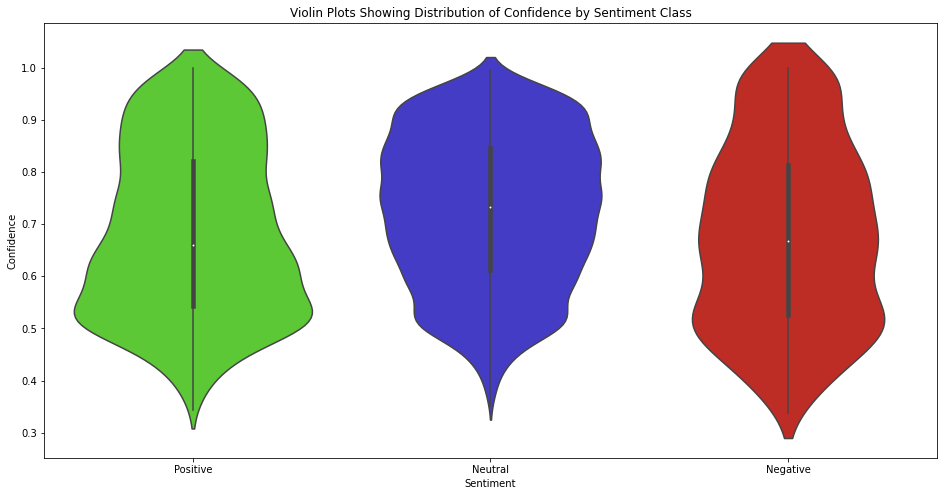

In [7]:
# Confidence Distribution by Sentiment

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Confidence by Sentiment Class")
g = sns.violinplot(data=master_df, x="Sentiment", y="Confidence", palette=s_pal, cut=1.0)
plt.show()

## Sentiment, Category, Frequency and Likes Interaction

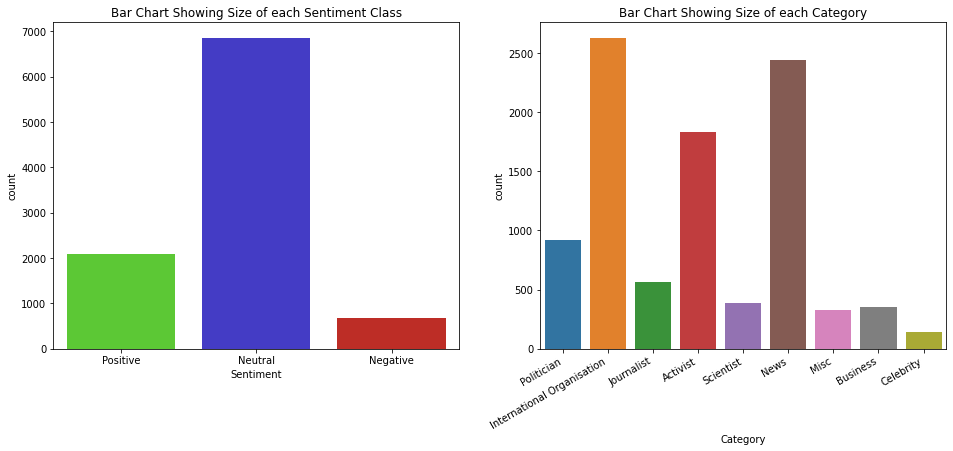

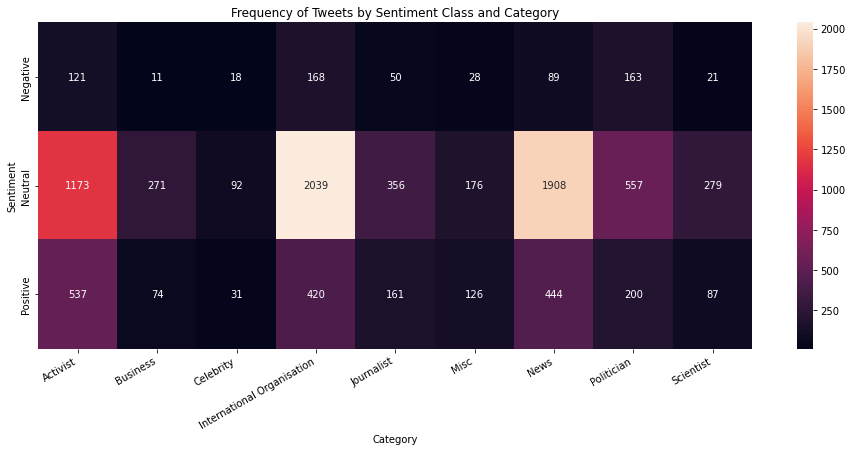

In [8]:
# Frequency Plots

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Bar Chart Showing Size of each Sentiment Class")
sns.countplot(data=master_df, x="Sentiment", palette=s_pal)

plt.subplot(122)
plt.title("Bar Chart Showing Size of each Category")
g=sns.countplot(data=master_df, x="Category")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

plt.figure(figsize=(16,6))
plt.title("Frequency of Tweets by Sentiment Class and Category")
heat = sns.heatmap(master_df.pivot_table(values="ID",index="Sentiment",columns="Category",aggfunc="count").fillna(0.0), annot=True, fmt="g")
heat.set_xticklabels(heat.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

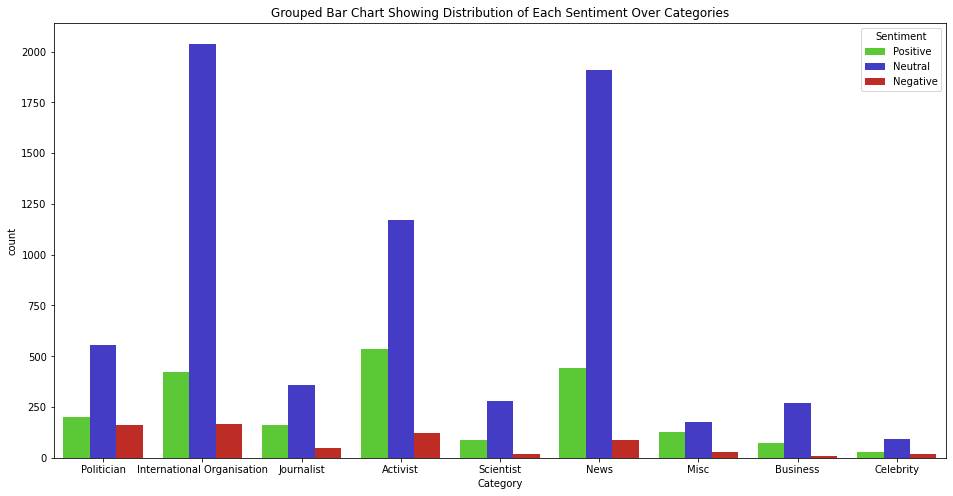

In [9]:
# Frequency by Category

plt.figure(figsize=(16,8))
plt.title("Grouped Bar Chart Showing Distribution of Each Sentiment Over Categories")
sns.countplot(data=master_df, x="Category", hue="Sentiment", palette=s_pal)
plt.show()

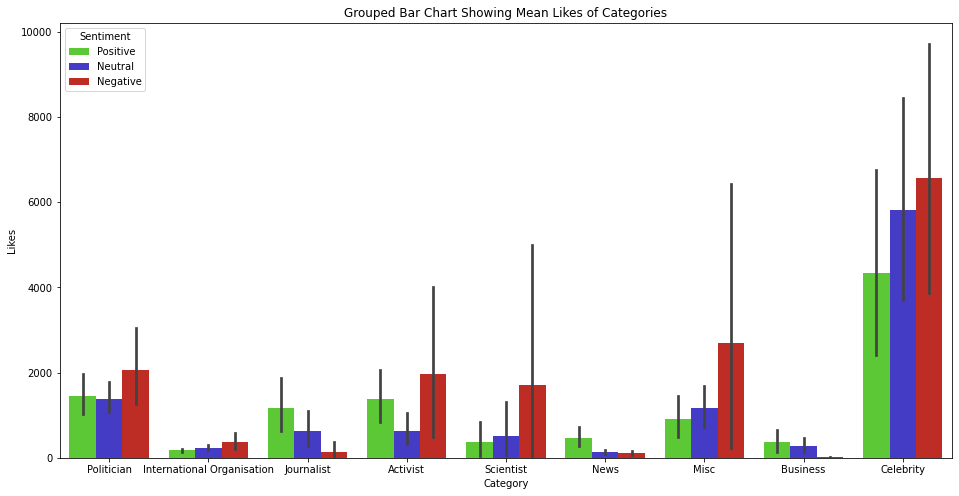

In [10]:
# Mean Likes by Category

plt.figure(figsize=(16,8))
plt.title("Grouped Bar Chart Showing Mean Likes of Categories")
g = sns.barplot(data=master_df, x="Category", y="Likes", hue="Sentiment", palette=s_pal)
plt.show()

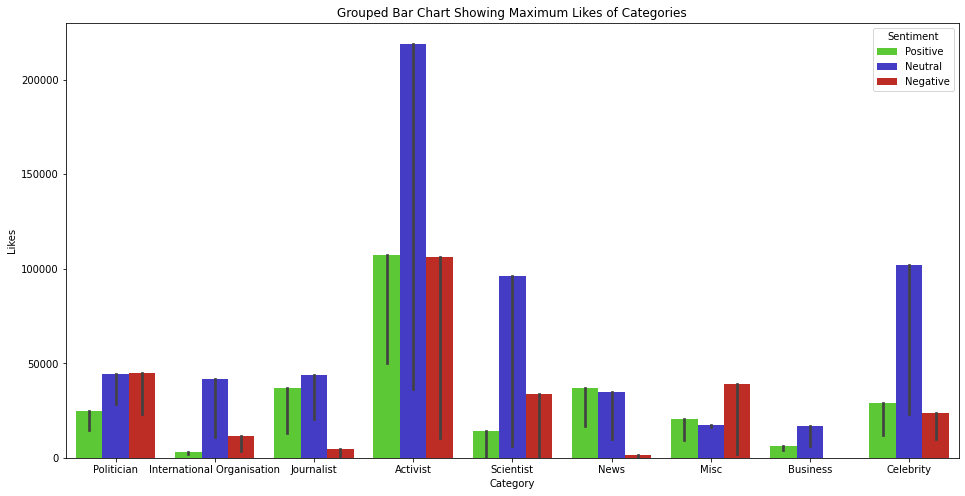

In [11]:
# Maximum Likes by Category

plt.figure(figsize=(16,8))
plt.title("Grouped Bar Chart Showing Maximum Likes of Categories")
sns.barplot(data=master_df, x="Category", y="Likes", hue="Sentiment", palette=s_pal, estimator=np.max)
plt.show()

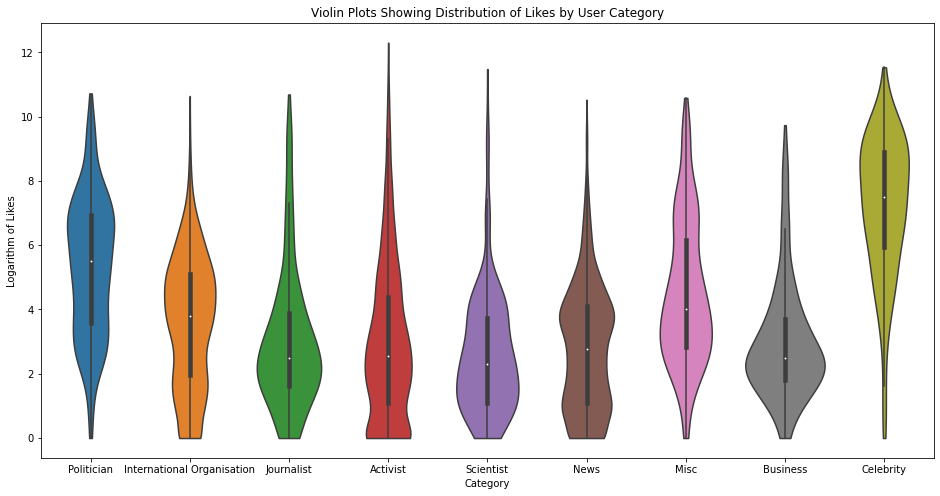

In [12]:
# Likes Distribution by Category

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Likes by User Category")
g = sns.violinplot(x=master_df["Category"], y=np.log(master_df["Likes"]+1), cut=0.0)
plt.ylabel("Logarithm of Likes")
plt.show()

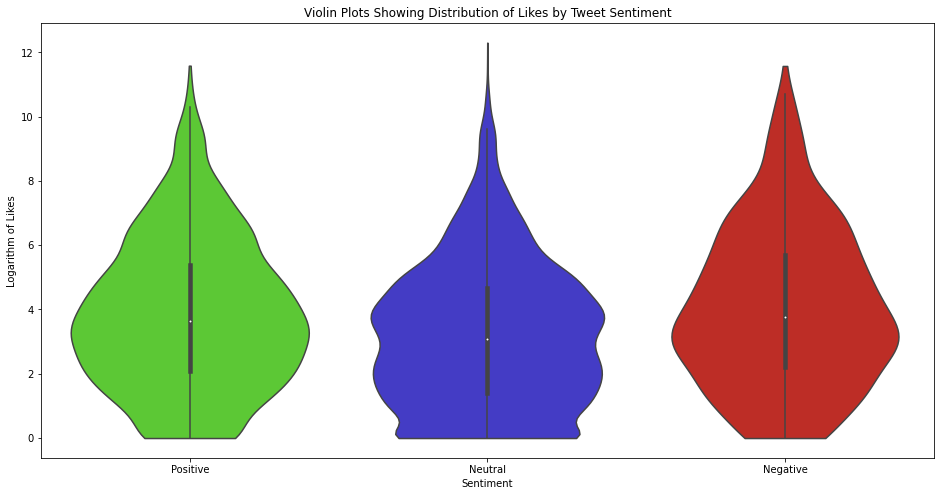

In [13]:
# Likes Distribution by Sentiment

plt.figure(figsize=(16,8))
plt.title("Violin Plots Showing Distribution of Likes by Tweet Sentiment")
g = sns.violinplot(x=master_df["Sentiment"], y=np.log(master_df["Likes"]+1), cut=0.0, palette=s_pal)
plt.ylabel("Logarithm of Likes")
plt.show()

## Pareto-Law Regression of Number of Likes

In [14]:
# Model the number of likes as a Pareto RV and find the parameters

b, loc, scale = scipy.stats.pareto.fit(master_df["Likes"])
b, loc, scale

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(0.37139008207704527, -2.5393768881676273, 2.5393768648064716)

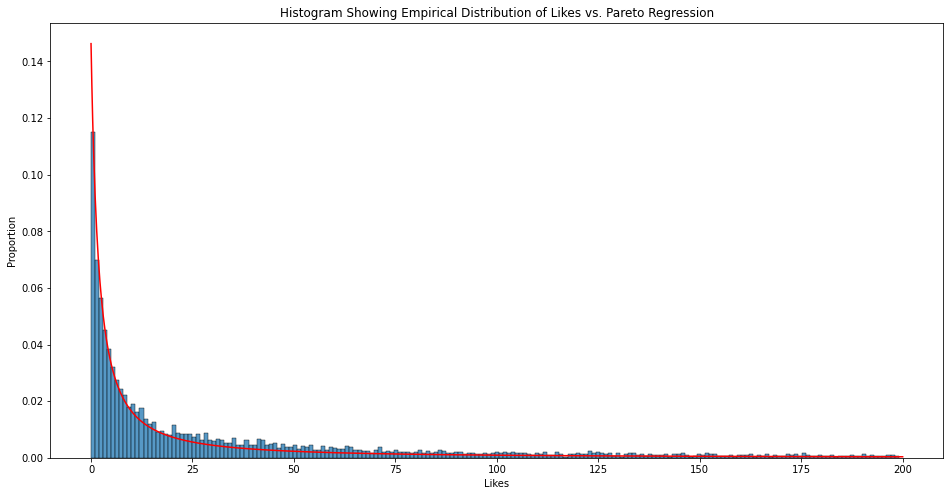

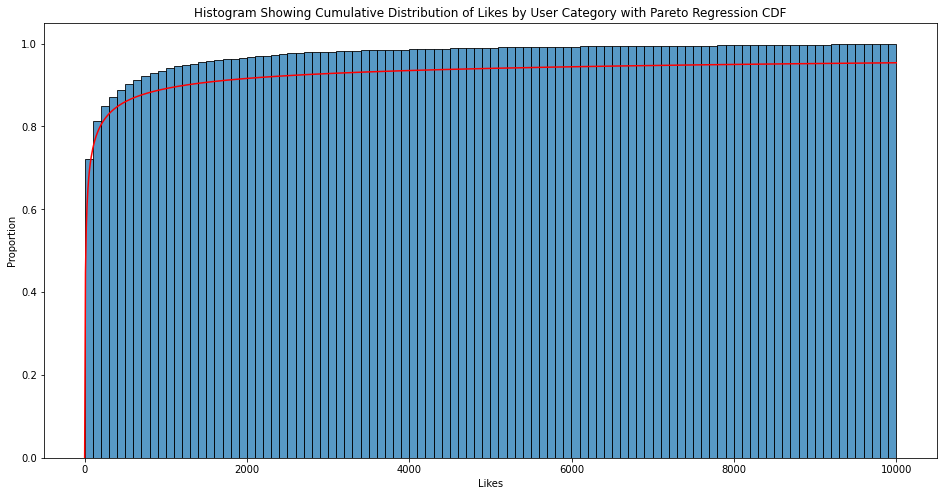

In [15]:
# PDF Plot
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Empirical Distribution of Likes vs. Pareto Regression")
g = sns.histplot(x=(master_df[master_df["Likes"]<200]["Likes"]), bins=200, stat="proportion")
X = np.linspace(0,200,1001)
plt.plot(X, scipy.stats.pareto.pdf(X, b, loc, scale), c="red")
plt.xlabel("Likes")
plt.show()

# CDF Plot
plt.figure(figsize=(16,8))
plt.title("Histogram Showing Cumulative Distribution of Likes by User Category with Pareto Regression CDF")
g = sns.histplot(x=(master_df[master_df["Likes"]<10000]["Likes"]), bins=100, stat="proportion", cumulative=True)
X = np.linspace(0,10000,1001)
plt.plot(X, scipy.stats.pareto.cdf(X, b, loc, scale), c="red")
plt.xlabel("Likes")
plt.show()

### Regression by Category

In [16]:
# Model the number of likes across categories as separate Pareto RVs and find parameters

likes_law_category_df = pd.DataFrame(master_df["Category"].unique(), columns = ["Category"])
likes_law_category_data = np.zeros((9,3))
for i in range(len(likes_law_category_df)):
    b, loc, scale = scipy.stats.pareto.fit(master_df[master_df["Category"] == likes_law_category_df.iloc[i,0]]["Likes"])
    likes_law_category_data[i] = np.array([b, loc, scale])
likes_law_category_df = pd.concat([likes_law_category_df, pd.DataFrame(likes_law_category_data, columns = ["b","loc","scale"])], axis=1)
likes_law_category_df.set_index("Category", inplace=True)
likes_law_category_df

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,b,loc,scale
Category,,,
Politician,0.257249,-4.426927,4.426927
International Organisation,0.358608,-3.080827,3.080827
Journalist,0.422977,-2.352384,2.352384
Activist,0.437749,-2.519776,2.519776
Scientist,0.120679,-1.793911,1.793911
News,0.362702,-1.313493,1.313493
Misc,0.268974,-2.497115,2.497114
Business,0.369404,-1.655625,1.655625
Celebrity,0.162383,-2.568630,2.568629


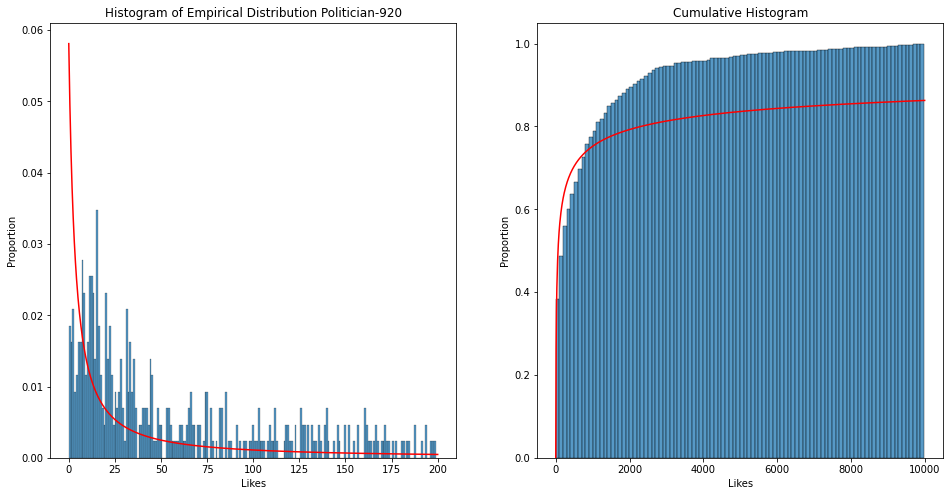

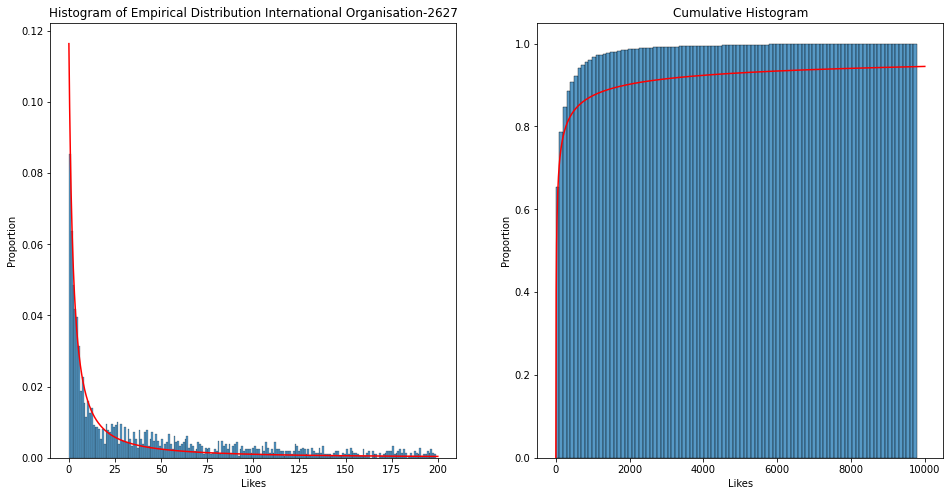

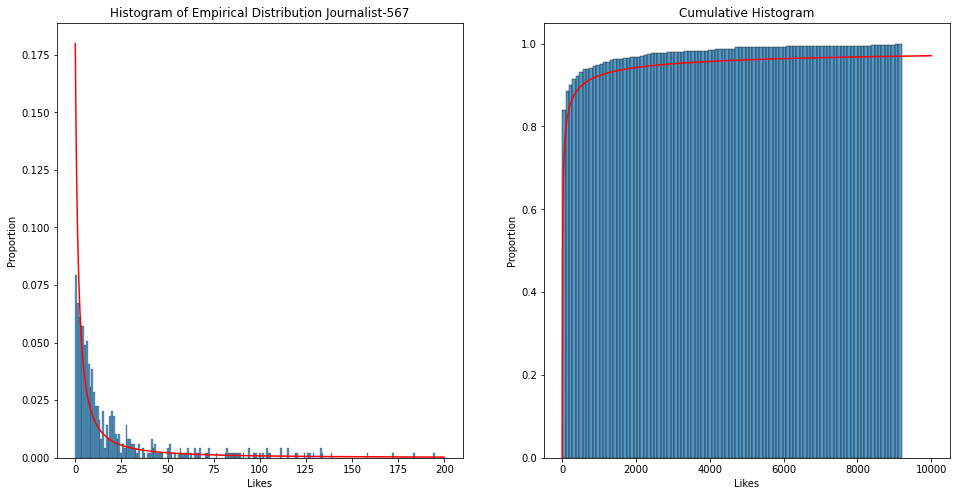

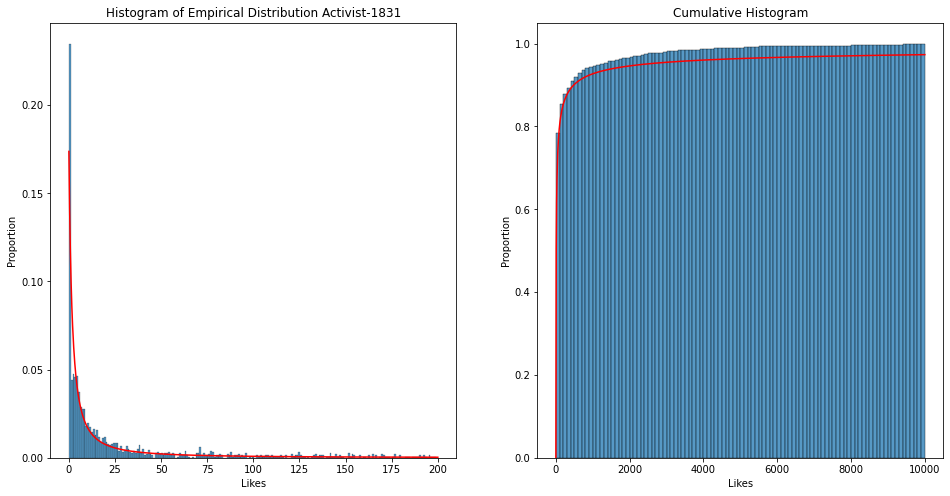

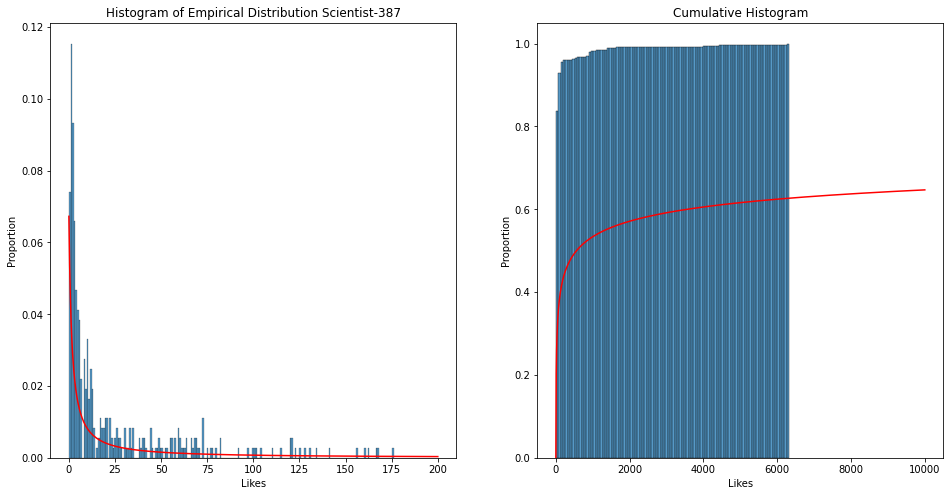

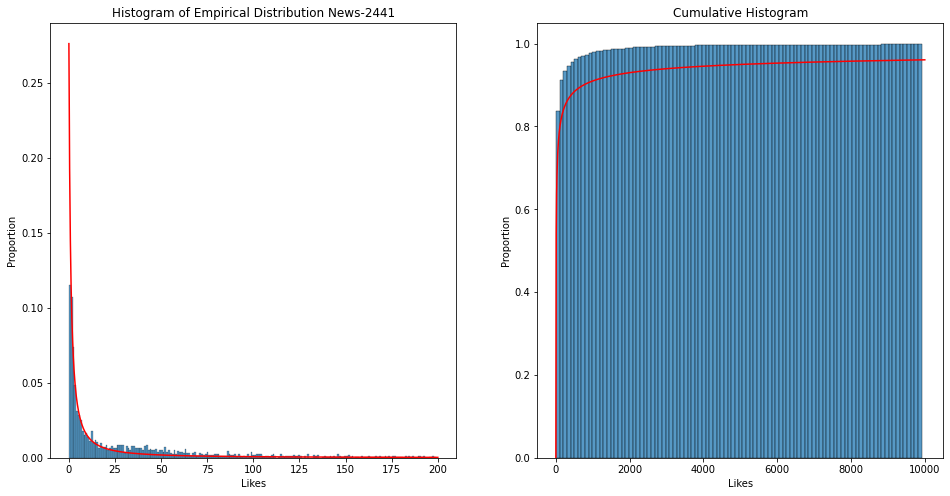

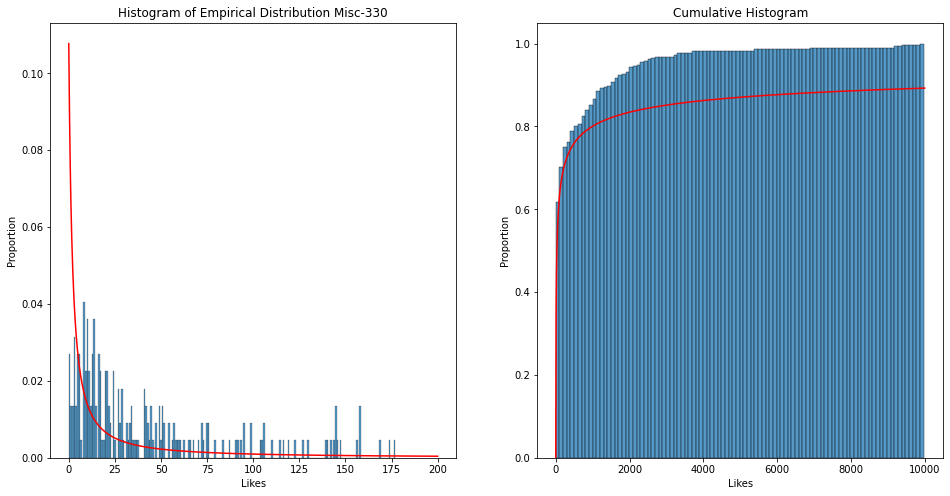

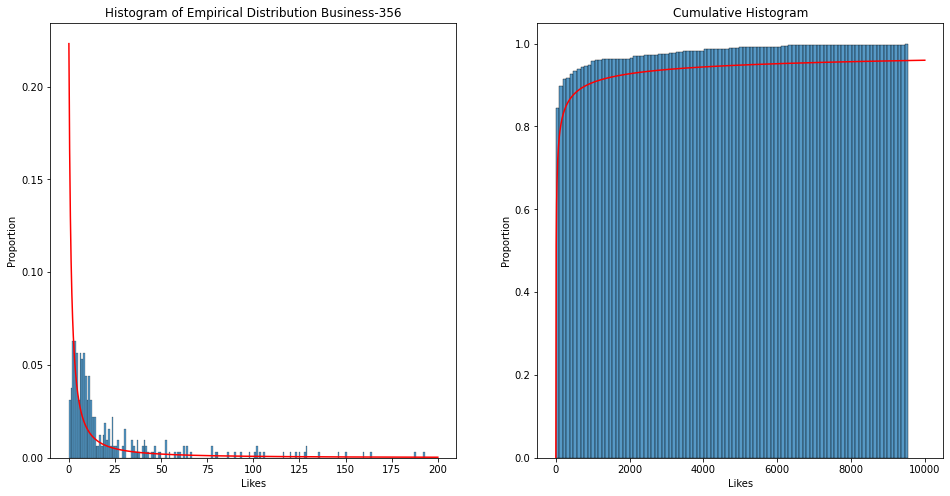

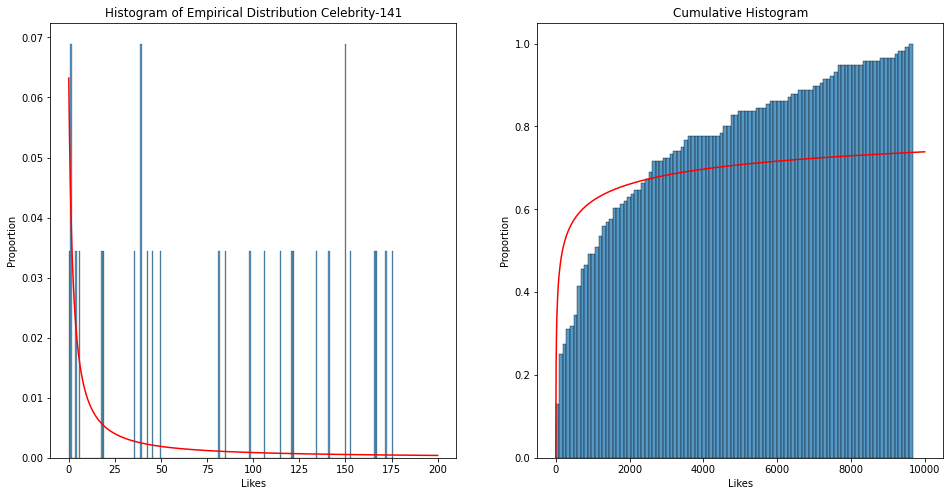

In [17]:
# Plot PDFs and CDFs

for cat in likes_law_category_df.index:
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title("Histogram of Empirical Distribution "+cat+"-"+str(sum(master_df["Category"]==cat)))
    g = sns.histplot(x=(master_df[(master_df["Likes"]<200) & (master_df["Category"]==cat)]["Likes"]), bins=200, stat="proportion")
    X = np.linspace(0,200,1001)
    plt.plot(X, scipy.stats.pareto.pdf(X, *tuple(likes_law_category_df.loc[cat])), c="red")
    plt.xlabel("Likes")

    plt.subplot(122)
    plt.title("Cumulative Histogram")
    g = sns.histplot(x=(master_df[(master_df["Likes"]<10000) & (master_df["Category"]==cat)]["Likes"]), bins=100, stat="proportion", cumulative=True)
    X = np.linspace(0,10000,1001)
    plt.plot(X, scipy.stats.pareto.cdf(X, *tuple(likes_law_category_df.loc[cat])), c="red")
    plt.xlabel("Likes")
    plt.show()

### Regression by Sentiment

In [18]:
# Model the number of likes across sentiment classes as separate Pareto RVs and find parameters

likes_law_sentiment_df = pd.DataFrame(master_df["Sentiment"].unique(), columns = ["Sentiment"])
likes_law_sentiment_data = np.zeros((3,3))
for i in range(len(likes_law_sentiment_df)):
    b, loc, scale = scipy.stats.pareto.fit(master_df[master_df["Sentiment"] == likes_law_sentiment_df.iloc[i,0]]["Likes"])
    likes_law_sentiment_data[i] = np.array([b, loc, scale])
likes_law_sentiment_df = pd.concat([likes_law_sentiment_df, pd.DataFrame(likes_law_sentiment_data, columns = ["b","loc","scale"])], axis=1)
likes_law_sentiment_df.set_index("Sentiment", inplace=True)
likes_law_sentiment_df

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,b,loc,scale
Sentiment,,,
Positive,0.298556,-1.677826,1.677826
Neutral,0.396705,-2.531877,2.531877
Negative,0.303547,-2.458199,2.458199


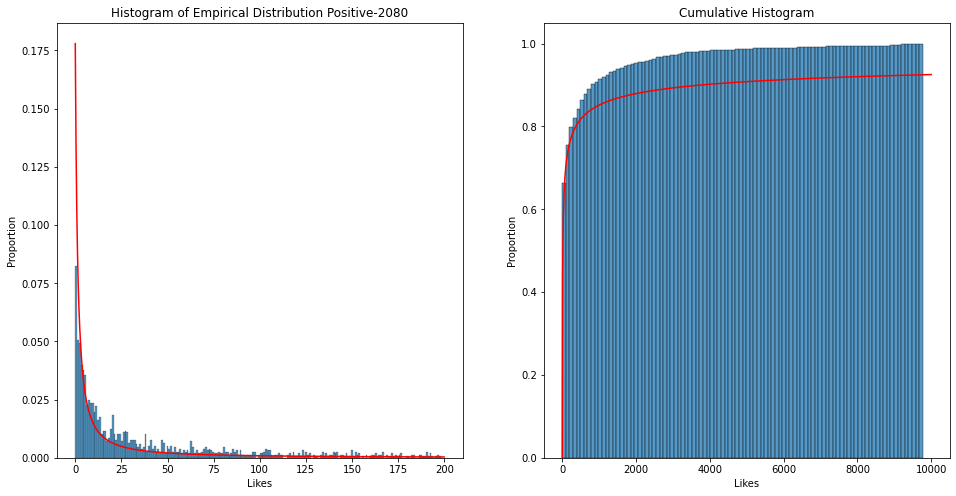

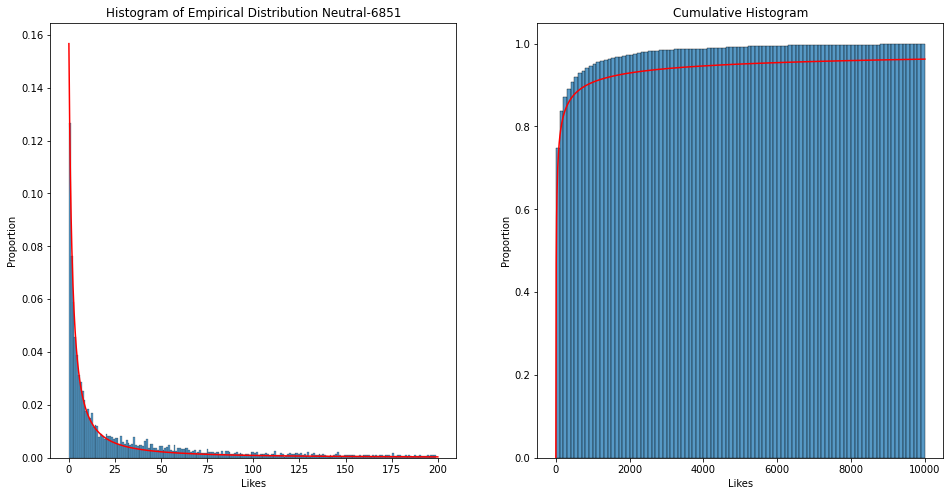

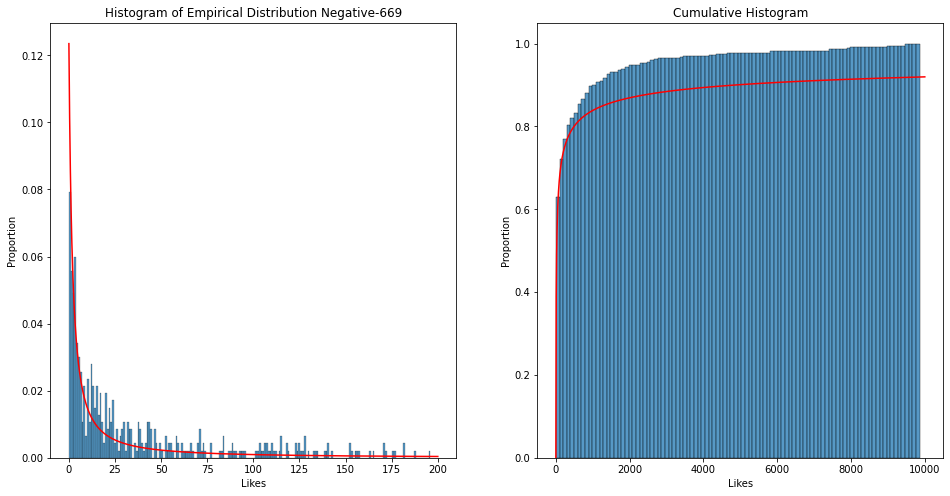

In [19]:
# Plot PDFs and CDFs

for sent in likes_law_sentiment_df.index:
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title("Histogram of Empirical Distribution "+sent+"-"+str(sum(master_df["Sentiment"]==sent)))
    g = sns.histplot(x=(master_df[(master_df["Likes"]<200) & (master_df["Sentiment"]==sent)]["Likes"]), bins=200, stat="proportion")
    X = np.linspace(0,200,1001)
    plt.plot(X, scipy.stats.pareto.pdf(X, *tuple(likes_law_sentiment_df.loc[sent])), c="red")
    plt.xlabel("Likes")

    plt.subplot(122)
    plt.title("Cumulative Histogram")
    g = sns.histplot(x=(master_df[(master_df["Likes"]<10000) & (master_df["Sentiment"]==sent)]["Likes"]), bins=100, stat="proportion", cumulative=True)
    X = np.linspace(0,10000,1001)
    plt.plot(X, scipy.stats.pareto.cdf(X, *tuple(likes_law_sentiment_df.loc[sent])), c="red")
    plt.xlabel("Likes")
    plt.show()

## Time Series Analysis

In [20]:
# Used to draw the annotations indicating the start and end of the conference.
start_end_dates = [dt.datetime.strptime("2018-12-02","%Y-%m-%d"),
                   dt.datetime.strptime("2018-12-14","%Y-%m-%d"),
                   dt.datetime.strptime("2019-12-02","%Y-%m-%d"),
                   dt.datetime.strptime("2019-12-13","%Y-%m-%d"),
                   dt.datetime.strptime("2021-10-31","%Y-%m-%d"),
                   dt.datetime.strptime("2021-11-12","%Y-%m-%d")]

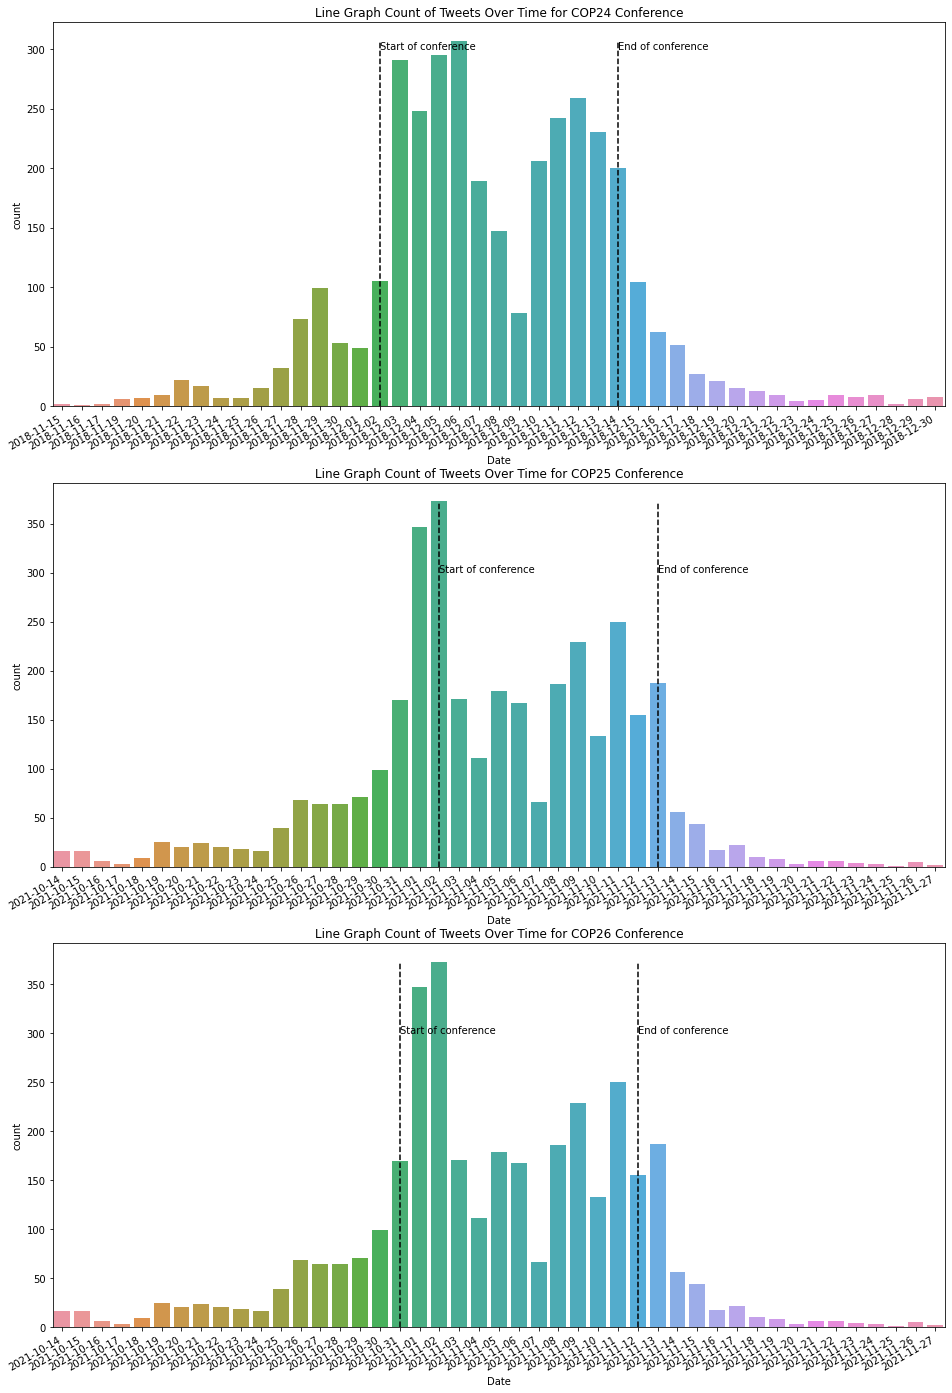

In [21]:
# Count of tweets over time
plt.figure(figsize=(16,24))

plt.subplot(311)
plt.title("Line Graph Count of Tweets Over Time for COP24 Conference")
g = sns.countplot(data=cop24_df, x="Date")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
# Start and end annotations
plt.axvline(16, 0, 0.95 , color="black", linestyle="--")
plt.axvline(28, 0, 0.95 , color="black", linestyle="--")
plt.text(16, 300, "Start of conference")
plt.text(28, 300, "End of conference")

plt.subplot(312)
plt.title("Line Graph Count of Tweets Over Time for COP25 Conference")
g = sns.countplot(data=cop26_df, x="Date")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
# Start and end annotations
plt.axvline(19, 0, 0.95 , color="black", linestyle="--")
plt.axvline(30, 0, 0.95 , color="black", linestyle="--")
plt.text(19, 300, "Start of conference")
plt.text(30, 300, "End of conference")

plt.subplot(313)
plt.title("Line Graph Count of Tweets Over Time for COP26 Conference")
g = sns.countplot(data=cop26_df, x="Date")
g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
# Start and end annotations
plt.axvline(17, 0, 0.95 , color="black", linestyle="--")
plt.axvline(29, 0, 0.95 , color="black", linestyle="--")
plt.text(17, 300, "Start of conference")
plt.text(29, 300, "End of conference")

plt.show()

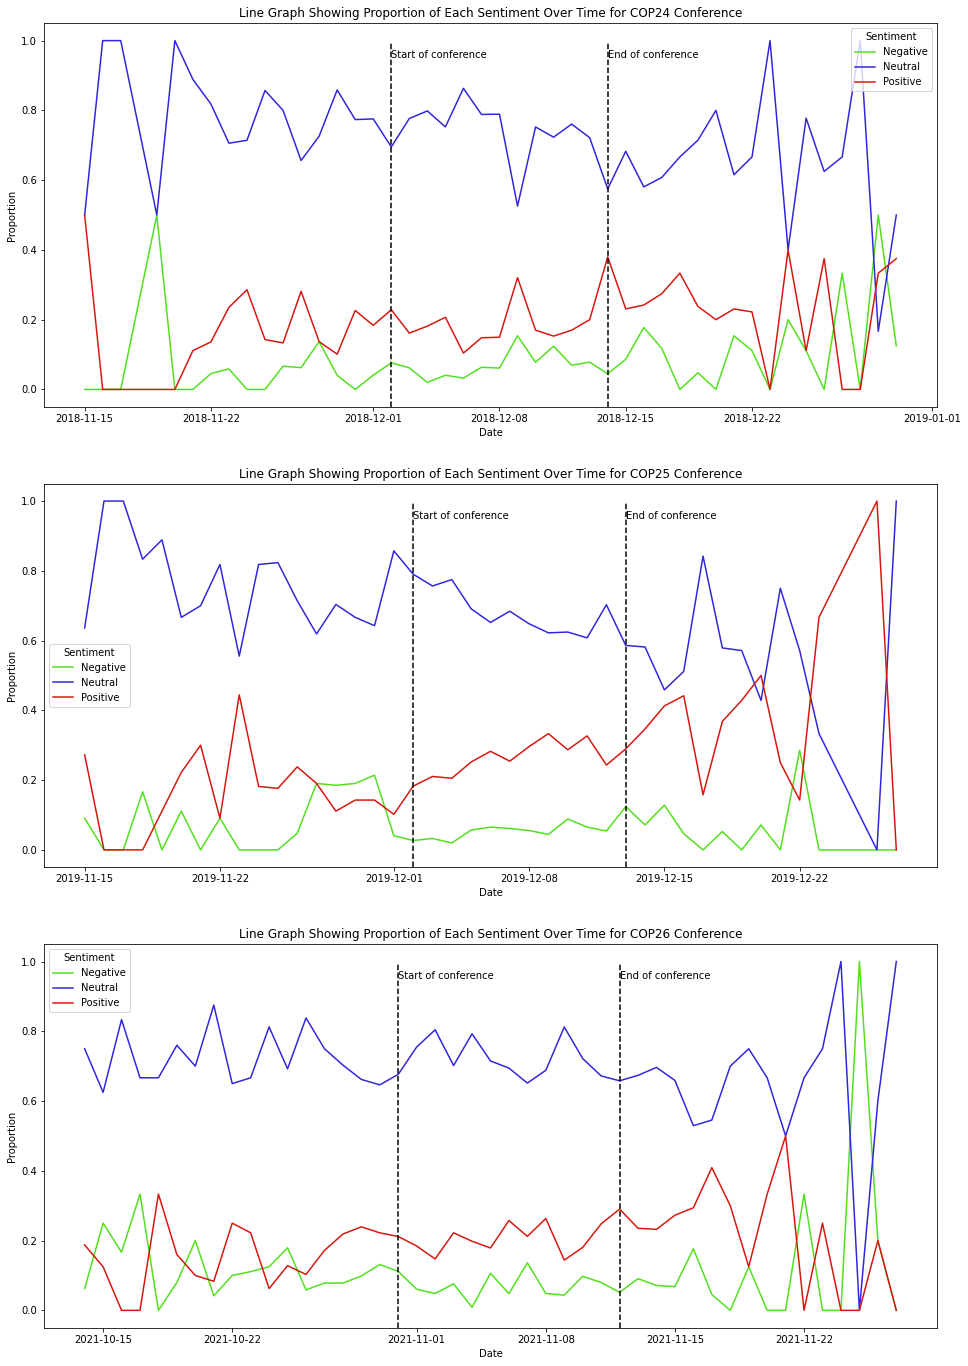

In [22]:
# Sentiment over time

plt.figure(figsize=(16,24))

for i, df in enumerate([cop24_df, cop25_df, cop26_df]):
    plt.subplot(311+i)
    plt.title("Line Graph Showing Proportion of Each Sentiment Over Time for COP"+str(24+i)+" Conference")
    sentiment_date_df = df.groupby(["Date","Sentiment"]).size().unstack(fill_value=0)
    sentiment_date_df = sentiment_date_df.div(sentiment_date_df.sum(axis=1), axis=0).reset_index()
    sentiment_date_df = sentiment_date_df.melt("Date", var_name="Sentiment", value_name="Proportion")
    g = sns.lineplot(data=sentiment_date_df, x="Date", y="Proportion", hue="Sentiment", palette=s_pal)
    # Start and end annotations
    plt.axvline(start_end_dates[2*i], 0, 0.95 , color="black", linestyle="--")
    plt.axvline(start_end_dates[2*i+1], 0, 0.95 , color="black", linestyle="--")
    plt.text(start_end_dates[2*i], 0.95, "Start of conference")
    plt.text(start_end_dates[2*i+1], 0.95, "End of conference")
plt.show()

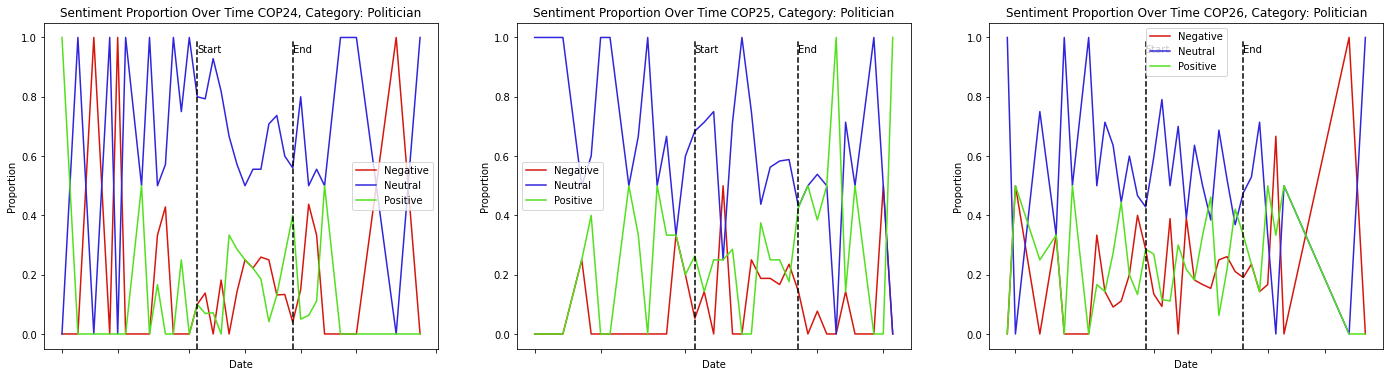

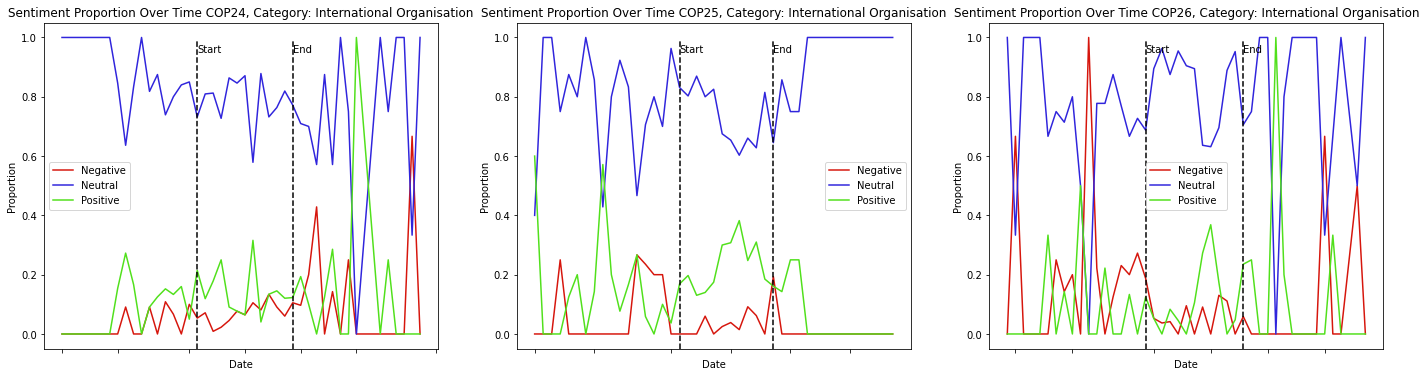

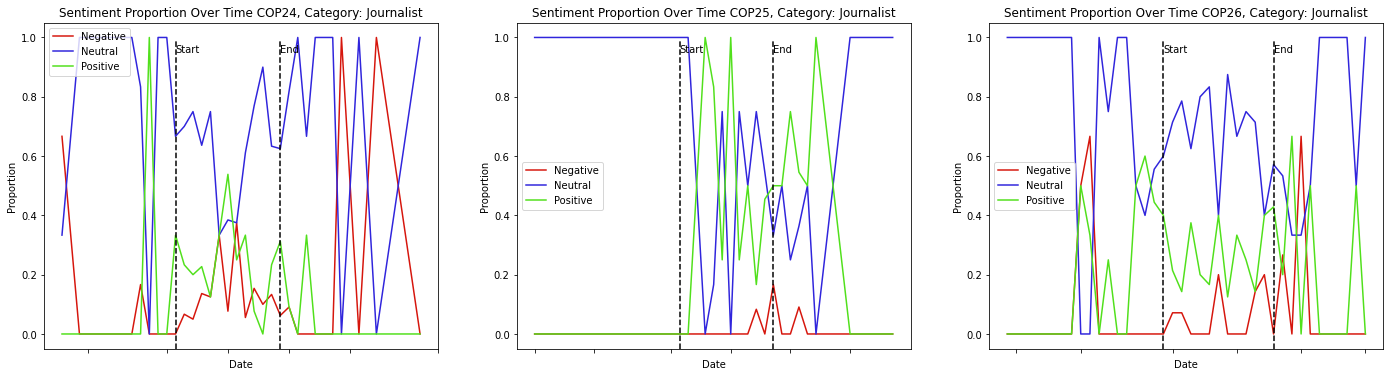

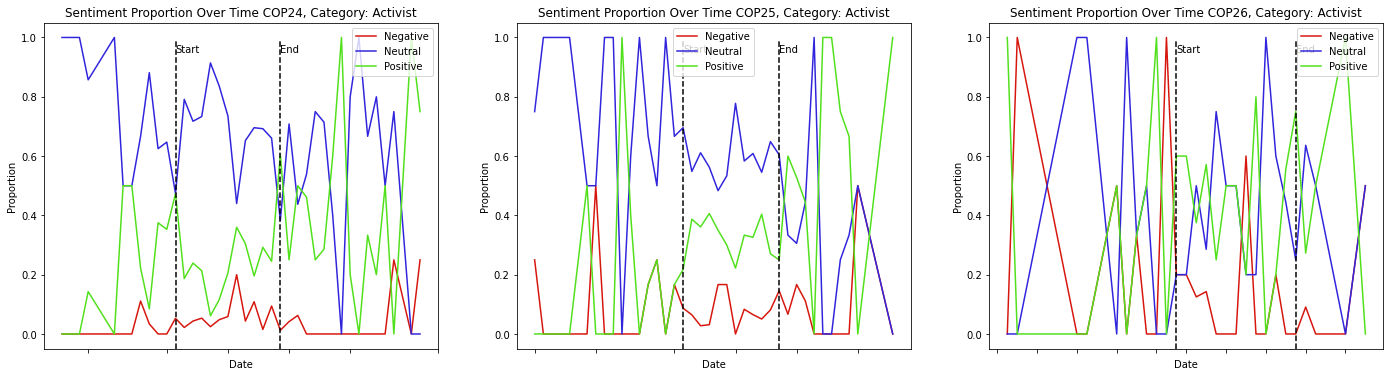

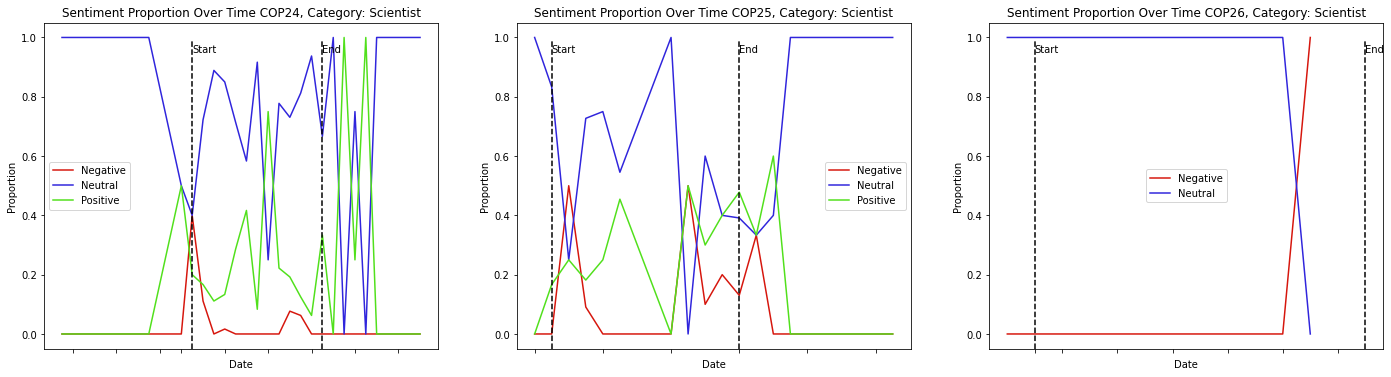

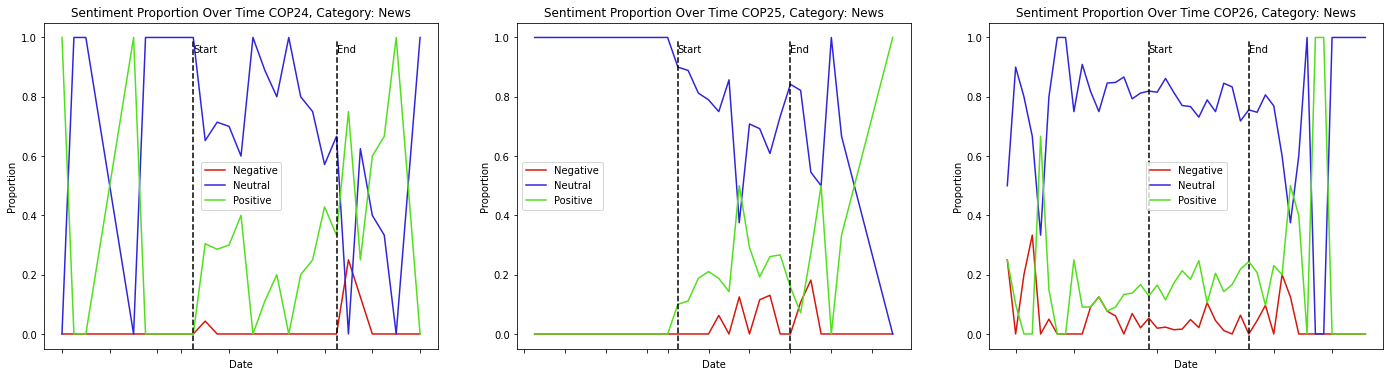

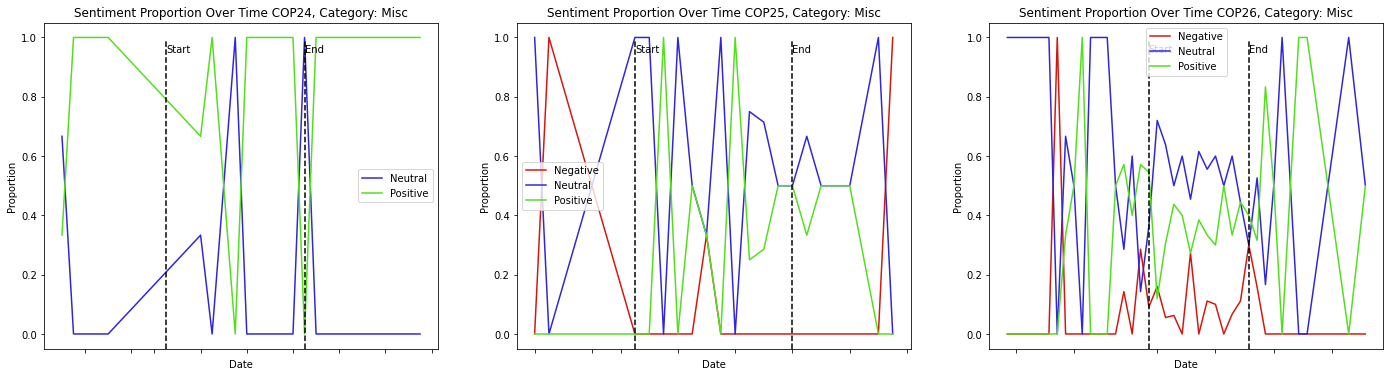

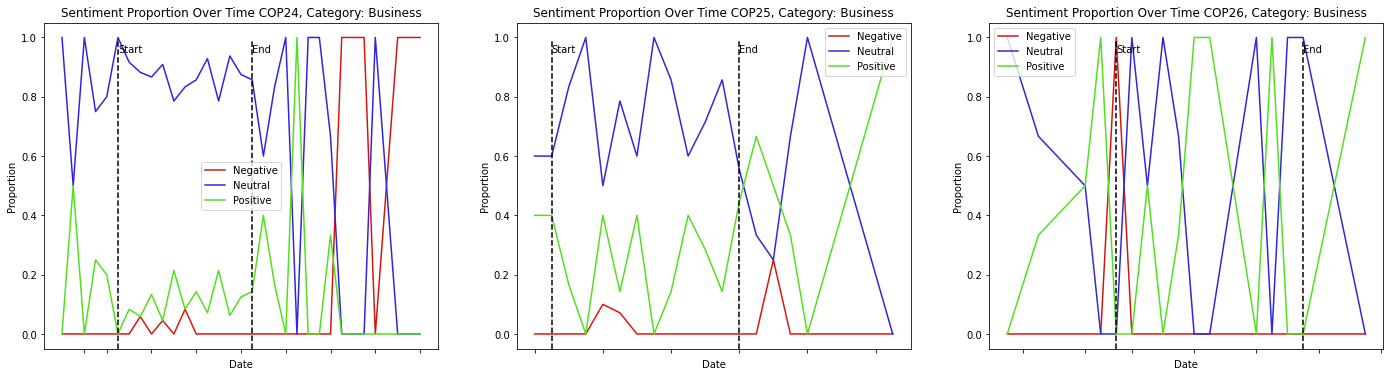

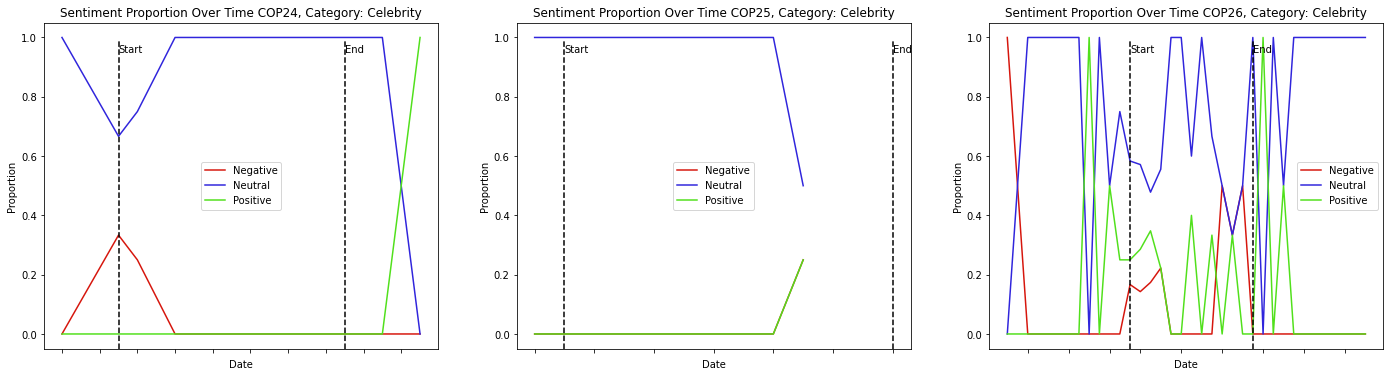

In [23]:
# Sentiment over time by Category

for cat in master_df["Category"].unique():
    plt.figure(figsize=(24,6))
    for i, df in enumerate([cop24_df[cop24_df["Category"]==cat], cop25_df[cop25_df["Category"]==cat], cop26_df[cop26_df["Category"]==cat]]):
        sentiment_date_df = df.groupby(["Date","Sentiment"]).size().unstack(fill_value=0)
        sentiment_date_df = sentiment_date_df.div(sentiment_date_df.sum(axis=1), axis=0).reset_index()
        sentiment_date_df = sentiment_date_df.melt("Date", var_name="Sentiment", value_name="Proportion")
        plt.subplot(131+i)
        plt.title("Sentiment Proportion Over Time COP"+str(24+i)+", Category: "+cat)
        # Some graphs do not invoke all three sentiment classes, thus we have to filter the colour palette each time
        g = sns.lineplot(data=sentiment_date_df, x="Date", y="Proportion", hue="Sentiment",
                         palette=[s_pal[list(sentiment_lookup.values()).index(x)] for x in sentiment_date_df["Sentiment"].unique()])
        g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment='right')
        # Start and end annotations
        plt.axvline(start_end_dates[2*i], 0, 0.95 , color="black", linestyle="--")
        plt.axvline(start_end_dates[2*i+1], 0, 0.95 , color="black", linestyle="--")
        plt.text(start_end_dates[2*i], 0.95, "Start")
        plt.text(start_end_dates[2*i+1], 0.95, "End")
        plt.legend(labels=sentiment_date_df["Sentiment"].unique())
    plt.show()